In [8]:
import torch
import numpy as np

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [31]:
X = np.arange(0, 10, 0.1)
y = np.sin(X)

X_in = Variable(torch.Tensor(X).cuda())
Y_in = Variable(torch.Tensor(y).cuda())
X_in = X_in.unsqueeze(1)

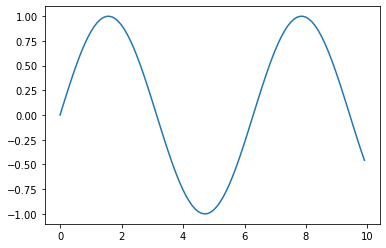

In [26]:
plt.plot(X,y)

In [66]:
class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 500),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(500, 1))
    def forward(self, x):
        output = self.regressor(x)
        return output

In [67]:
# Define the Model with the input parameters
model = SineApproximator().cuda()

# Define the Criterion: mean-squared error loss since we are working with regression problem
criterion = torch.nn.MSELoss()

# Define the Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005)


In [68]:
# Define the number of epochs
number_of_epochs = 2000

# Variable to store the losses per epoch
losses = []

# Instanciate that the model is in training mode
model.train()

# For every epoch defined...
for epoch in range(number_of_epochs):

    # Initialize the gradient to avoid value agregations
    optimizer.zero_grad()       

    # Predict the model using the training set
    y_pred = model(X_in)

    # Obtain the loss and the error
    loss = criterion(y_pred, Y_in)
            
        
    # Backpropagation
    loss.backward()
        
    optimizer.step()

    # Append the losses to make the plot
    losses.append(loss.item())
    
    # Print the results
    if epoch % 2 == 0:
        print("-----> Epoch: %d, ----->loss: %.5E" % (epoch, loss.item()))
        print("Learning Rate: %.6E " % optimizer.param_groups[0]["lr"])


/home/aamaral/.venv/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


-----> Epoch: 0, ----->loss: 1.00697E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 2, ----->loss: 1.27140E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 4, ----->loss: 5.25878E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 6, ----->loss: 8.08170E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 8, ----->loss: 2.47548E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 10, ----->loss: 1.74818E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 12, ----->loss: 6.36563E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 14, ----->loss: 1.86696E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 16, ----->loss: 6.30305E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 18, ----->loss: 8.93179E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 20, ----->loss: 1.09897E+00
Learning Rate: 5.000000E-03 
-----> Epoch: 22, ----->loss: 4.41620E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 24, ----->loss: 8.78998E-01
Learning Rate: 5.000000E-03 
-----> Epoch: 26, ----->loss: 6.35905E-01
Learning Rate: 5.000000E-03 
-----> Epoc

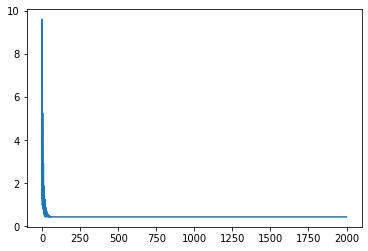

In [69]:
plt.plot(losses)

In [70]:
model.eval()
pred = model(X_in)
pred = pred.cpu().data.numpy()
x_plot = X_in.cpu().data.numpy()

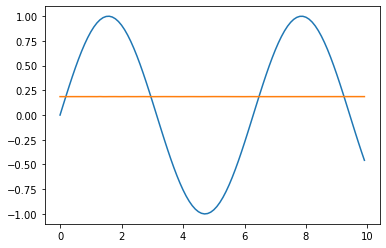

In [80]:
plt.plot(X,y)
plt.plot(X,pred)

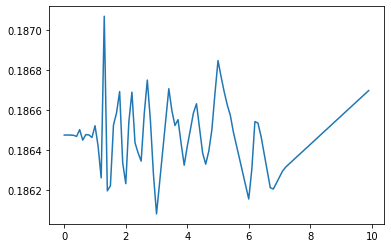

In [81]:
plt.plot(X,pred)

FC1 Weights and Bias Files

In [90]:
middle = []
w1 = model.regressor[0].weight.detach().cpu().numpy()

first = '{%f' %w1[0]
middle_out = ',%f' %w1[1]
last = '}'

middle = first + middle_out

for i in (n+2 for n in range(np.size(model.regressor[0].weight,0)-2)):
    aux = ',%f' %w1[i]
    middle = middle + aux
w1_VA = middle + last


In [91]:
middle = []
b1 = model.regressor[0].bias.detach().cpu().numpy()

first = '{%f' %b1[0]
middle_out = ',%f' %b1[1]
last = '}'

middle = first + middle_out

for i in (n+2 for n in range(np.size(model.regressor[0].bias,0)-2)):
    aux = ',%f' %b1[i]
    middle = middle + aux
b1_VA = middle + last

In [92]:
# Write VerilogA Code
import csv

with open('Weights_Layer_1.va', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['  parameter real w1[499:0] = %s' %w1_VA, ';'])
    writer.writerow(['  parameter real b1[499:0] = %s' %b1_VA, ';'])